In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
br_stocks = pd.read_csv("acoes_brasil.csv", sep=";", decimal=",", thousands='.').fillna(0)
print(br_stocks.columns)
# print(br_stocks.dtypes)
br_stocks.head()

Index(['TICKER', 'PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT',
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO'],
      dtype='object')


,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,10.41,0.00,-4.30,1.42,0.49,30.29,-1.09,-25.30,-99.75,...,0.34,0.65,0.45,0.13,0.00,1.898619e+06,7.32,-2.42,-0.01,1.231428e+09
1,ABCB4,19.86,6.07,5.71,0.83,0.08,31.62,25.25,19.35,4.38,...,0.10,0.90,0.07,18.70,12.95,1.226095e+07,23.98,3.48,0.39,4.490150e+09
2,ABEV3,12.98,5.86,14.34,2.41,1.54,49.95,21.50,17.26,11.52,...,0.64,0.35,0.62,10.72,14.46,3.329247e+08,5.40,0.91,2.64,2.047998e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.000000e+00,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,0.81,0.00,-5.82,0.74,0.20,13.03,9.37,-3.59,2.23,...,0.27,0.73,0.93,0.00,0.00,6.355384e+06,1.10,-0.14,0.00,6.206329e+08


In [41]:
# br_stocks.apply(lambda x : x[ x["P/L"] > 3 ].sort_values(by="P/L").head(20))
top_equity_df = br_stocks[ (br_stocks["P/L"] > 3) & (br_stocks["P/L"] < 20) ].sort_values(by="P/L").head(50)
top_equity_tickers = set(top_equity_df["TICKER"].unique())
print(top_equity_tickers)
# print(top_equity_df)
br_stocks["point_1"] = br_stocks.apply(lambda x : 2 if x["TICKER"] in top_equity_tickers else 0, axis=1)

top_dy_df = br_stocks[ (br_stocks["DY"] > 5) & (br_stocks["DY"] < 20) ]
top_dy_tickers = set(top_dy_df["TICKER"].unique())
print(top_dy_tickers)
# print(top_dy_df)
br_stocks["point_2"] = br_stocks.apply(lambda x : 0.5 if x["TICKER"] in top_dy_tickers else 0, axis=1)

top_pvp_df = br_stocks[ (br_stocks["P/VP"] > 0) & (br_stocks["P/VP"] < 2) ]
top_pvp_tickers = set(top_pvp_df["TICKER"].unique())
print(top_pvp_tickers)
# print(top_pvp_df)
br_stocks["point_3"] = br_stocks.apply(lambda x : 1 if x["TICKER"] in top_pvp_tickers else 0, axis=1)

top_net_margin_df = br_stocks[ (br_stocks["MARG. LIQUIDA"] > 10) & (br_stocks["MARG. LIQUIDA"] < 100) ]
top_net_margin_tickers = set(top_net_margin_df["TICKER"].unique())
print(top_net_margin_tickers)
# print(top_net_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["TICKER"] in top_net_margin_tickers else 0, axis=1)

top_gross_margin_df = br_stocks[ (br_stocks["MARGEM BRUTA"] > 10) & (br_stocks["MARGEM BRUTA"] < 100) ]
top_gross_margin_tickers = set(top_gross_margin_df["TICKER"].unique())
print(top_gross_margin_tickers)
# print(top_gross_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["TICKER"] in top_gross_margin_tickers else 0, axis=1)

br_stocks["point_sum"] = sum([br_stocks["point_%d" % i] for i in range(1, 5)])

{'FIGE3', 'HBTS5', 'GOAU4', 'MEAL3', 'EUCA4', 'VALE3', 'CTKA3', 'GOAU3', 'NEOE3', 'POSI3', 'EPAR3', 'SAPR11', 'JALL3', 'CIEL3', 'CTKA4', 'NAFG4', 'COCE5', 'CMIG4', 'G2DI33', 'BNBR3', 'CLSC4', 'BAZA3', 'GGBR4', 'TECN3', 'CGRA3', 'ROMI3', 'MTRE3', 'CLSC3', 'PETR3', 'EEEL4', 'BMKS3', 'CEDO3', 'PLAS3', 'AURE3', 'SAPR3', 'SUZB3', 'SAPR4', 'CAMB4', 'CEDO4', 'HAGA3', 'CAMB3', 'GGBR3', 'ALSO3', 'PETR4', 'TIET11', 'EUCA3', 'MTSA4', 'BBAS3', 'EEEL3', 'BRAP4'}
{'RAPT3', 'GOAU4', 'USIM5', 'MRFG3', 'EVEN3', 'GOAU3', 'RPAD5', 'LREN3', 'POMO4', 'EQPA3', 'CMIG4', 'CGAS3', 'EQPA5', 'EGIE3', 'CGAS5', 'ENBR3', 'KLBN4', 'UCAS3', 'LAND3', 'BGIP3', 'WIZC3', 'BMKS3', 'CSRN3', 'CPLE11', 'BRSR5', 'SAPR4', 'CMIN3', 'BEES3', 'FESA4', 'TAEE11', 'JBSS3', 'EKTR4', 'REDE3', 'SANB3', 'TAEE3', 'TASA3', 'CXSE3', 'BRAP4', 'ENMT3', 'HBTS5', 'BRAP3', 'SOND5', 'ALUP4', 'MELK3', 'BRBI11', 'CSRN6', 'EMAE3', 'GEPA4', 'CEBR5', 'CEBR3', 'TAEE4', 'CPLE6', 'BGIP4', 'VIVT3', 'ABEV3', 'CPLE3', 'FESA3', 'TASA4', 'TKNO4', 'CSRN5', 'K

In [54]:
br_stocks.sort_values(by="point_sum", ascending=False).head(30)

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,point_1,point_2,point_3,point_4,point_sum,normalised_DY,normalised_P/L,normalised_P/VP,normalised_MARG. LIQUIDA,normalised_MARGEM BRUTA
310,HBTS5,50.00,5.80,3.81,0.80,0.32,89.64,133.89,118.82,3.38,...,2,0.5,1,1,4.5,-0.022946,-0.041949,-0.032240,0.061103,0.235736
157,CLSC4,63.23,5.15,3.98,0.76,0.21,15.14,9.03,5.98,2.64,...,2,0.5,1,1,4.5,-0.028709,-0.041863,-0.032246,-0.036957,0.066751
46,BAZA3,89.02,5.99,4.00,0.91,0.12,29.18,53.10,34.41,2.59,...,2,0.5,1,1,4.5,-0.021262,-0.041853,-0.032222,-0.012251,0.098597
47,BBAS3,48.82,9.40,4.31,0.86,0.07,32.03,16.16,12.35,3.29,...,2,0.5,1,1,4.5,0.008971,-0.041696,-0.032230,-0.031421,0.105061
512,SAPR4,4.72,7.90,5.23,0.79,0.40,60.18,34.84,23.19,3.48,...,2,0.5,1,1,4.5,-0.004328,-0.041232,-0.032241,-0.022001,0.168913
511,SAPR3,4.62,7.35,5.11,0.77,0.39,60.18,34.84,23.19,3.40,...,2,0.5,1,1,4.5,-0.009204,-0.041293,-0.032245,-0.022001,0.168913
510,SAPR11,23.76,7.74,5.24,0.79,0.40,60.18,34.84,23.19,3.48,...,2,0.5,1,1,4.5,-0.005746,-0.041227,-0.032241,-0.022001,0.168913
498,ROMI3,11.70,8.43,4.74,0.95,0.48,32.50,17.85,14.09,3.74,...,2,0.5,1,1,4.5,0.000371,-0.041480,-0.032215,-0.029909,0.106128
75,BMKS3,318.99,18.12,5.40,0.73,0.63,26.67,51.94,153.94,16.01,...,2,0.5,1,1,4.5,0.086283,-0.041147,-0.032251,0.091622,0.092904
464,POSI3,6.67,7.62,4.50,0.69,0.25,28.20,13.05,5.62,1.94,...,2,0.5,1,1,4.5,-0.006810,-0.041601,-0.032258,-0.037269,0.096374


['normalised_DY', 'normalised_P/L', 'normalised_P/VP', 'normalised_MARG. LIQUIDA', 'normalised_MARGEM BRUTA']


<Axes: >

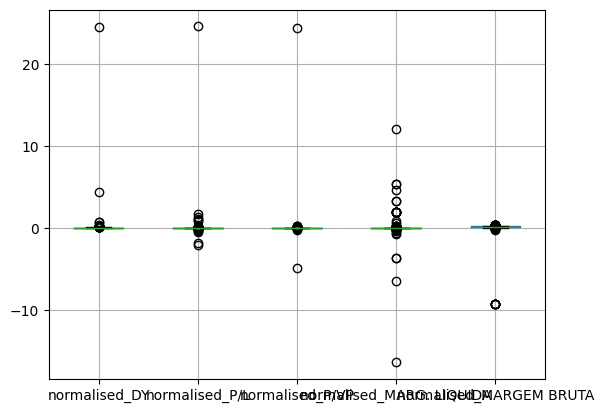

In [3]:
desired_cols = ["DY", "P/L", "P/VP", "MARG. LIQUIDA", "MARGEM BRUTA"]
modified_cols = []

for col in desired_cols:
    new_col = "normalised_" + col
    modified_cols.append(new_col)
    
    col_vals = br_stocks[col]
    # print(col_vals, col_vals.mean(), col_vals.std())
    br_stocks[new_col] = ( col_vals - col_vals.mean() ) / col_vals.std()   

print(modified_cols)
# print(br_stocks)
br_stocks.boxplot(column=modified_cols, showfliers=False)